<a href="https://colab.research.google.com/github/SeraphineMukabugingo/homeworks_huzalabs/blob/master/homework9_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Exploration and Cleaning
#### 1.	Load the Data:


In [ ]:
import nltk

# Retry downloading stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# reading the file with  encoding
df_orginal = pd.read_csv('netflix_titles.csv', encoding='latin1')
df_orginal.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_orginal.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_orginal["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
8807                               Sci-fi, Horror, Action
8808                             Drama, Romance, Thriller
Name: listed_in, Length: 8809, dtype: object

In [ ]:
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8660 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
df_orginal.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added       149
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df_orginal.isna().sum().sum()

4446

# 2.Investigate the Data:

####  a. Missing Values:


###### Handling missing values using mean

In [ ]:

categorical_columns = ['director', 'cast', 'country', 'date_added']
for col in categorical_columns:
    df_orginal[col] = df_orginal[col].fillna('Unknown')
df_orginal.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_orginal.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
# dropping the remaining columns with missing values because they have few missing values
df_no_other_missing=df_orginal.dropna(axis=1)
df_no_other_missing

,show_id,type,title,director,cast,country,date_added,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-Sep-21,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,24-Sep-21,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [ ]:
# check if there are any missing values
df_no_other_missing.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
listed_in       0
description     0
dtype: int64

###  b. Data Types:

#### 1.		Identify any inconsistencies (e.g., dates stored as strings).

In [ ]:
df_no_other_missing.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
listed_in       object
description     object
dtype: object

#### Convert columns to appropriate data types if necessary (e.g., converting "date_added" to datetime format).

In [ ]:
# Convert 'date_added' to datetime
df_orginal.loc[:, 'date_added'] = pd.to_datetime(df_orginal['date_added'], errors='coerce')
#df_no_other_missing.loc[:, 'date_added'] = pd.to_datetime(df_no_other_missing['date_added'], format='%d-%b-%y', errors='coerce')
# Ensure 'date_added' is in datetime format
#df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Display the summary of the dataset again to check changes
print("\nUpdated Dataset Info:")
print(df_orginal.info())

C:\Users\HP\AppData\Local\Temp\ipykernel_14276\148756344.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orginal.loc[:, 'date_added'] = pd.to_datetime(df_orginal['date_added'], errors='coerce')



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    7881 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


#### c. Descriptive Statistics:

#### Calculate descriptive statistics like mean, median, and standard deviation for numerical columns using df.describe().

In [ ]:
df_no_other_missing.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


## c.	Categorical Data Analysis:

#### Identify categorical columns (e.g., "type", "genre").


In [ ]:
# Identify categorical columns
categorical_columns = df_orginal.select_dtypes(include=['object']).columns

# Print the names of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')



#### Use methods like df['type'].value_counts() to explore the distribution of categories within these columns.

In [ ]:
# Explore the distribution of categories within categorical columns
categorical_columns = df_orginal.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Column: {column}")
    print(df_orginal[column].value_counts())
    print()

Column: show_id
show_id
s1       1
s5876    1
s5870    1
s5871    1
s5872    1
        ..
s2932    1
s2931    1
s2930    1
s2929    1
s8809    1
Name: count, Length: 8809, dtype: int64

Column: type
type
Movie      6132
TV Show    2677
Name: count, dtype: int64

Column: title
title
22-Jul                                    2
9-Feb                                     2
15-Aug                                    2
Dick Johnson Is Dead                      1
Marco Polo: One Hundred Eyes              1
                                         ..
Good Time                                 1
Captain Underpants Epic Choice-o-Rama     1
We Bare Bears                             1
To All the Boys: P.S. I Still Love You    1
Serena                                    1
Name: count, Length: 8806, dtype: int64

Column: director
director
Unknown                           2634
Rajiv Chilaka                       19
RaÃºl Campos, Jan Suter             18
Suhas Kadav                         16
Marcus Rab

C:\Users\HP\AppData\Local\Temp\ipykernel_14276\1235889772.py:6: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df_orginal[column].value_counts())


In [ ]:
# because to make a plot of all categorical data is very complex ,i choose "type" on of categorical data .

In [ ]:
# Analyze distribution of categories
count_type = df_no_other_missing['type'].value_counts()
print(count_type)


type
Movie      6132
TV Show    2677
Name: count, dtype: int64


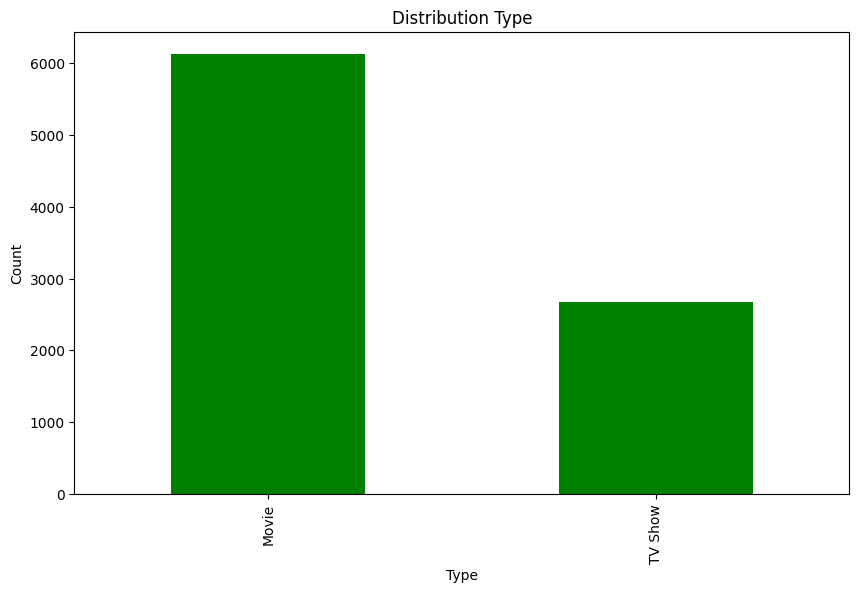

In [ ]:
# Bar chart for 'type' distribution
plt.figure(figsize=(10, 6))
count_type.plot(kind='bar', color='green')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution Type')
plt.show()

In [ ]:
# 3.Data cleaning
#####  Because i was cleaned my data before visualizing one of categorical data "type ",now let clean "title"
##### i have to use it later

In [ ]:
# Let's clean the Title column as it contains some data preparation:
import re
import string

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text

# Assuming df is your DataFrame and it has a 'title' column
df_orginal["title"] = df_orginal["title"].apply(clean)


In [ ]:
#Print Random number from the title
print(df_no_other_missing.title.sample(10))

5525       Lucas Brothers: On Drugs
382                    All American
1004             Izzy's Koala World
6526                     Concussion
4531                      LOST SONG
6279    Being Mary Jane: The Series
5715                       La NiÃ±a
8389               The Last Whistle
3697              War Against Women
6536                       Coraline
Name: title, dtype: object


# Task 2: Data Visualization

#### 1.	Release Year Distribution:

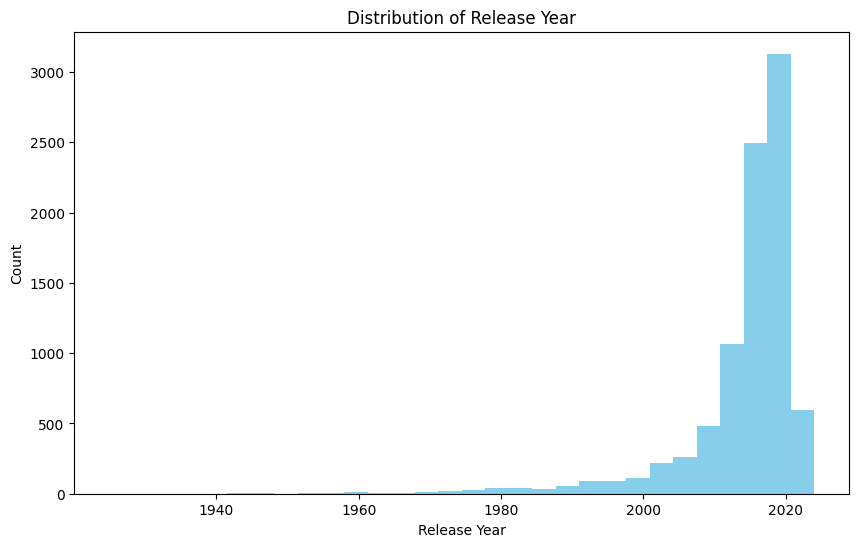

In [ ]:
# Histogram for release year distribution
plt.figure(figsize=(10, 6))
df_no_other_missing['release_year'].plot(kind='hist', bins=30, color="skyblue")
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

###  2.	Rating by Type:

###### 	Calculate the average rating for "Movie" and "TV Show" categorie

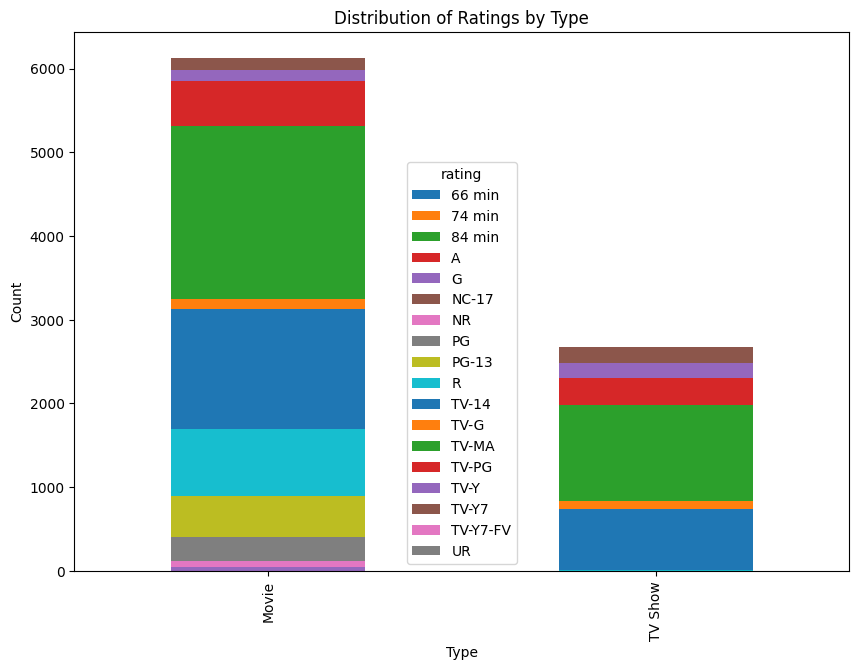

In [ ]:
# First :
# Rating by Type
rating_by_type = df_orginal.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plotting
rating_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### 3.	Duration vs Rating:

C:\Users\HP\AppData\Local\Temp\ipykernel_14276\3128144698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orginal['rating_num'].fillna(0, inplace=True)



Average Rating by Type:
type
Movie      3.967384
TV Show    4.007845
Name: rating_num, dtype: float64


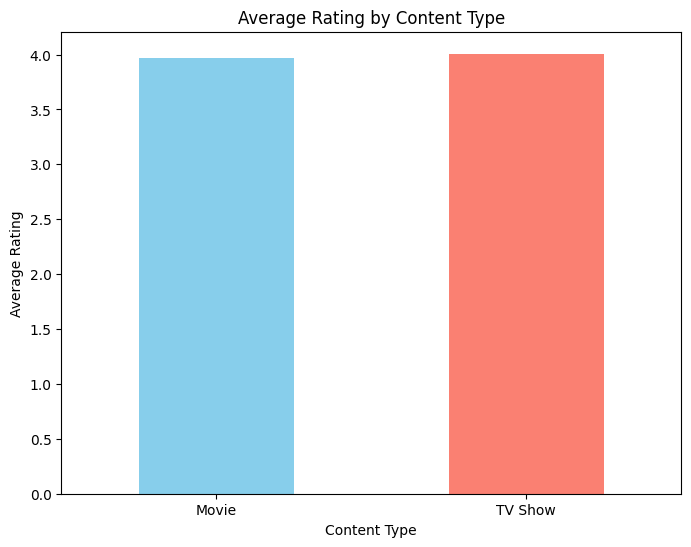

In [ ]:
rating_mapping = {
    'TV-G': 0,
    'NR': 0,
    'UR': 0,
    'TV-Y': 0,
    'G': 0,
    'PG': 1,
    'TV-PG': 1,
     'PG-13': 2,
    'TV-Y7': 3,
    'TV-Y7-FV': 3,
     'TV-14': 4,
    'R': 5,
    'TV-MA': 6,
    'A': 6,
    'NC-17': 6
}
df_orginal['rating_num'] =df_orginal['rating'].map(rating_mapping)

# Handle any unmapped ratings (shouldn't be necessary if all ratings are covered)
df_orginal['rating_num'].fillna(0, inplace=True)

# Calculate the average rating for each type
average_rating = df_orginal.groupby('type')['rating_num'].mean()
print("\nAverage Rating by Type:")
print(average_rating)

# Create a bar chart to compare average ratings
average_rating.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_orginal['listed_in'].explode().value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
Drama, Romance, Thriller                                1
Name: count, Length: 516, dtype: int64

In [ ]:
df_no_other_missing['listed_in'].explode().value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
Drama, Romance, Thriller                                1
Name: count, Length: 516, dtype: int64

In [ ]:
df_orginal.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_num
0,s1,Movie,dick johnson dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2.0
1,s2,TV Show,blood water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.0


In [ ]:
df_orginal.head(2)
df_mode = df_orginal['rating_num'].mode()[0]
df_mode


6.0

In [ ]:
df_orginal['rating_num'].fillna(df_mode)

0       2.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
8804    5.0
8805    1.0
8806    4.0
8807    6.0
8808    6.0
Name: rating_num, Length: 8809, dtype: float64

In [ ]:
df_orginal['rating_num'].isnull().sum()

0

In [ ]:
import pandas as pd

# Sample data
data = {'duration': ['2 Seasons', '90 min', '3 Seasons', '120 min', None, '45 min']}
df_orginal = pd.DataFrame(data)

# Function to convert duration to minutes
def convert_duration(duration):
    try:
        if isinstance(duration, str):
            if 'Season' in duration:
                # Extract the number of seasons and convert to minutes (assuming 1 season = 7200 minutes)
                return int(duration.split()[0]) * 7200
            elif 'min' in duration:
                # Extract the number of minutes
                return int(duration.replace('min', '').strip())
            else:
                # Handle unexpected formats gracefully
                return None
        else:
            # Handle non-string inputs (e.g., None, NaN)
            return None
    except (ValueError, IndexError):
        return None

# Apply the conversion function to the 'duration' column
df_orginal['duration_numeric'] = df_orginal['duration'].apply(convert_duration)

# Display the result
print(df_orginal['duration_numeric'])


0    14400.0
1       90.0
2    21600.0
3      120.0
4        NaN
5       45.0
Name: duration_numeric, dtype: float64


In [ ]:
df_orginal.head(2)
df_mode = df_orginal['duration_numeric'].mode()[0]
df_mode

45.0

In [ ]:
df_orginal['duration_numeric'].fillna(df_mode)

0    14400.0
1       90.0
2    21600.0
3      120.0
4       45.0
5       45.0
Name: duration_numeric, dtype: float64

In [ ]:
df_orginal['duration_numeric'].isnull().sum()

1

In [ ]:
print(df_orginal['duration_numeric'] . to_list())

[14400.0, 90.0, 21600.0, 120.0, nan, 45.0]


In [ ]:
import pandas as pd

# Sample data
data = {'duration': ['2 Seasons', '90 min', '3 Seasons', '120 min', None, '45 min']}
df_orginal = pd.DataFrame(data)

# Function to convert duration to minutes
def convert_duration(duration):
    try:
        if isinstance(duration, str):
            if 'Season' in duration:
                # Extract the number of seasons and convert to minutes (assuming 1 season = 7200 minutes)
                return int(duration.split()[0]) * 7200
            elif 'min' in duration:
                # Extract the number of minutes
                return int(duration.replace('min', '').strip())
            else:
                # Handle unexpected formats gracefully
                return None
        else:
            # Handle non-string inputs (e.g., None, NaN)
            return None
    except (ValueError, IndexError):
        return None

# Apply the conversion function to the 'duration' column
df_orginal['duration_numeric'] = df_orginal['duration'].apply(convert_duration)

# Display all records in the 'duration_numeric' column
print(df_orginal['duration_numeric'].to_list())


[14400.0, 90.0, 21600.0, 120.0, nan, 45.0]


In [ ]:
df_orginal.head(2)
df_mode = df_orginal['duration_numeric'].mode()[0]
df_mode

45.0